# RFE to calculate the accuracy

In [51]:
def rfeFeature(indep_X, dep_Y, n):
    rfelist = []
    selected_features={}
    
    # Define the models
    log_model = LogisticRegression(solver='saga',max_iter=1000, random_state=0)
    RF = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    DT = DecisionTreeClassifier(criterion='gini', max_features='sqrt', splitter='best', random_state=0)
    svc_model =SVC(kernel='linear', C=0.5, class_weight='balanced', max_iter=2000, tol=0.0001, random_state=0)
    #print('rfe functions called ')
    
    # List of models to use in RFE
    rfemodellist = [log_model, svc_model, RF, DT]
    
    # Apply RFE for each model
    for model in rfemodellist:
        print(model)  # To show which model is currently being processed
        # Corrected RFE initialization
        log_rfe = RFE(estimator=model, n_features_to_select=n)
        print(log_rfe)
        log_fit = log_rfe.fit(indep_X, dep_Y)
        log_rfe_feature = log_fit.transform(indep_X)
        selected_columns=indep_X.columns[log_rfe.support_].tolist()
        selected_features[model.__class__.__name__]=selected_columns
        rfelist.append(log_rfe_feature)
        print("Transformed features with RFE:", log_rfe_feature.shape)

    
    return rfelist,selected_features

In [52]:
def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
        #X_train, X_test, y_train, y_test = train_test_split(indep_X,dep_Y, test_size = 0.25, random_state = 0)
        
        #Feature Scaling
        #from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_train_scaled = sc.fit_transform(X_train)
        X_test_scaled = sc.transform(X_test)
        #print('split_scalar called')
        return X_train_scaled, X_test_scaled, y_train, y_test

In [53]:
def cm_prediction(classifier,X_test):
     y_pred = classifier.predict(X_test)
        
        # Making the Confusion Matrix
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
        
     from sklearn.metrics import accuracy_score 
     from sklearn.metrics import classification_report 
        #from sklearn.metrics import confusion_matrix
        #cm = confusion_matrix(y_test, y_pred)
        
     Accuracy=accuracy_score(y_test, y_pred )
        
     report=classification_report(y_test, y_pred)
     #print('cm prediction called')
     return  classifier,Accuracy,report,X_test,y_test,cm

In [54]:
def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        #print('logistic function called')
        return  classifier,Accuracy,report,X_test,y_test,cm 
    
def svm_linear(X_train,y_train,X_test):        
        from sklearn.svm import SVC
        classifier = SVC(kernel='linear', C=0.5, class_weight='balanced', max_iter=2000, tol=0.0001, random_state=0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        #print('svm linear called')
        return  classifier,Accuracy,report,X_test,y_test,cm

def svm_NL(X_train,y_train,X_test):        
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        #print('svm nl called')
        return  classifier,Accuracy,report,X_test,y_test,cm
    
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        #print('naive called')
        return  classifier,Accuracy,report,X_test,y_test,cm

def knn(X_train,y_train,X_test):
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        #print('knn called')
        return  classifier,Accuracy,report,X_test,y_test,cm

def Decision(X_train,y_train,X_test):
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        #print('decision called')
        return  classifier,Accuracy,report,X_test,y_test,cm

def random(X_train,y_train,X_test):
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        #print('random called')
        return  classifier,Accuracy,report,X_test,y_test,cm

In [55]:
def random(X_train,y_train,X_test):
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        #print('random called')
        return  classifier,Accuracy,report,X_test,y_test,cm

In [56]:
def rfe_classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    rfedataframe=pd.DataFrame(index=['Logistic','SVC','Random','DecisionTree'],columns=['Logistic','SVMl','SVMnl',
                                                                                        'KNN','Navie','Decision','Random'])

    for number,idex in enumerate(rfedataframe.index):
        
        rfedataframe['Logistic'][idex]=acclog[number]       
        rfedataframe['SVMl'][idex]=accsvml[number]
        rfedataframe['SVMnl'][idex]=accsvmnl[number]
        rfedataframe['KNN'][idex]=accknn[number]
        rfedataframe['Navie'][idex]=accnav[number]
        rfedataframe['Decision'][idex]=accdes[number]
        rfedataframe['Random'][idex]=accrf[number]
    return rfedataframe

In [57]:
dataset=pd.read_csv('Loan_datanew.csv')

In [58]:
indep_X=dataset.drop('loan_status', axis=1)
indep_X

,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,debt_to_income_ratio,total_assets_value,loan_to_asset_ratio
0,0,0,9600000,29900000,12,778,3.114583,50700000,0.589744
1,1,1,4100000,12200000,8,417,2.975610,17000000,0.717647
2,0,0,9100000,29700000,20,506,3.263736,57700000,0.514731
3,0,0,8200000,30700000,8,467,3.743902,52700000,0.582543
4,1,1,9800000,24200000,20,382,2.469388,55000000,0.440000
...,...,...,...,...,...,...,...,...,...
4264,0,1,1000000,2300000,12,317,2.300000,7400000,0.310811
4265,1,1,3300000,11300000,20,559,3.424242,20000000,0.565000
4266,1,0,6500000,23900000,18,457,3.676923,39000000,0.612821
4267,1,0,4100000,12800000,8,780,3.121951,28800000,0.444444


In [59]:
dep_Y=dataset['loan_status']
dep_Y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int64

In [60]:
rfelist,selected_features=rfeFeature(indep_X,dep_Y,8)       

acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]

for i in rfelist:   
    X_train, X_test, y_train, y_test=split_scalar(i,dep_Y)   
    
        
    classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
    acclog.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
    accsvml.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
    accsvmnl.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
    accknn.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
    accnav.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
    accdes.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
    accrf.append(Accuracy)
    
result=rfe_classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

print ('8 RFE classification result is:\n',result)

LogisticRegression(max_iter=1000, random_state=0, solver='saga')
RFE(estimator=LogisticRegression(max_iter=1000, random_state=0, solver='saga'),
    n_features_to_select=8)
Transformed features with RFE: (4269, 8)
SVC(C=0.5, class_weight='balanced', kernel='linear', max_iter=2000,
    random_state=0, tol=0.0001)
RFE(estimator=SVC(C=0.5, class_weight='balanced', kernel='linear',
                  max_iter=2000, random_state=0, tol=0.0001),
    n_features_to_select=8)
Transformed features with RFE: (4269, 8)
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
RFE(estimator=RandomForestClassifier(criterion='entropy', n_estimators=10,
                                     random_state=0),
    n_features_to_select=8)
Transformed features with RFE: (4269, 8)
DecisionTreeClassifier(max_features='sqrt', random_state=0)
RFE(estimator=DecisionTreeClassifier(max_features='sqrt', random_state=0),
    n_features_to_select=8)
Transformed features with RFE: (4269, 8)
8 RFE cla

In [61]:
print('Selected_Features:')
for model_name,features in selected_features.items():
    print(f'{model_name}:{features}')

Selected_Features:
LogisticRegression:['education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'debt_to_income_ratio', 'total_assets_value']
SVC:['education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'debt_to_income_ratio', 'total_assets_value']
RandomForestClassifier:['self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'debt_to_income_ratio', 'total_assets_value', 'loan_to_asset_ratio']
DecisionTreeClassifier:['self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'debt_to_income_ratio', 'total_assets_value', 'loan_to_asset_ratio']


# Creating Model using RandomForestClassifier

In [62]:
from sklearn.model_selection import GridSearchCV

# Instantiate the model
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],             # Number of trees in the forest
                                                # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2', None],     # Number of features considered for splitting
                                                # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy','log_loss']            # Splitting criterion
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    refit=True,             # 5-fold cross-validation
    scoring='f1', # Or use 'f1', 'roc_auc', etc., depending on your goal
    n_jobs=-1,          # Use all available cores for parallel processing
    verbose=3
)


grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
#print("Best Score:", grid_search.best_score_)

# You can also retrieve the best model directly
best_rf = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'criterion': 'gini', 'max_features': None, 'n_estimators': 50}


Accuracy: 0.9990636704119851
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       659
           1       1.00      1.00      1.00       409

    accuracy                           1.00      1068
   macro avg       1.00      1.00      1.00      1068
weighted avg       1.00      1.00      1.00      1068



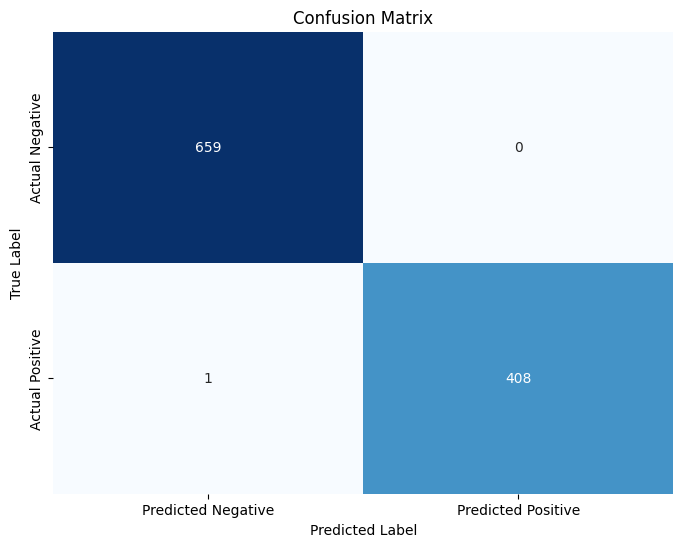

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the best model from GridSearchCV
y_pred = best_rf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print out accuracy and classification report for more insight
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [64]:
import pickle
filename='Loan_approval_prediction.sav'
pickle.dump(grid_search,open(filename,'wb'))

In [65]:
loaded_model=pickle.load(open('Loan_approval_prediction.sav','rb'))

In [75]:
def get_categorical_prediction(Prediction):
    return 'Approved' if Prediction==1 else 'Rejected'

#education=(input('Education: '))
self_employed=(input('Self_Employed        : '))
income_annum=(input('Income_annum        : '))
loan_amount=(input('Loan_amount         : '))
loan_term=(input('Loan_term           : '))
cibil_score=(input('Cibil_score            : '))
debt_to_income_ratio=(input('Debt_to_income_ratio: '))
total_assets_value=(input('Total_assets_value  : '))
loan_to_asset_ratio=(input('Loan_to_asset_ratio: '))

Self_Employed        :  0
Income_annum        :  10000000
Loan_amount         :  1000000
Loan_term           :  20
Cibil_score            :  850
Debt_to_income_ratio:  2.5
Total_assets_value  :  10000000
Loan_to_asset_ratio:  .25


In [76]:
result=loaded_model.predict([[self_employed,income_annum,loan_amount,loan_term,cibil_score,debt_to_income_ratio,total_assets_value,loan_to_asset_ratio]])

In [77]:
model_prediction=get_categorical_prediction(result)
model_prediction

'Rejected'

In [78]:
print('Bank ',model_prediction,'the customer application')

Bank  Rejected the customer application
